## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE UNIPR

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "http://rosa.unipr.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Homepage  « Ro.S.A. » 


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['http://sea.unipr.it/en',
 'FSDA/fsdadownload.html',
 'team.html',
 '#',
 'FSDA/guide.html',
 'project.html',
 'http://www.unipr.it/ateneo/organi-e-strutture/centri-e-altre-strutture/centri-universitari/rostabidac',
 'fsda_video.html',
 'http://en.unipr.it',
 'themes.html',
 'https://link.springer.com/article/10.1007/s11222-012-9329-5',
 None,
 'research.html',
 'activities.html',
 'index.html',
 'respartners.html',
 'fsda.html',
 'contact.html',
 'poster_FSDA.pdf']

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
res
matchers = ['themes','research','fsda','project']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['fsda_video.html',
 'themes.html',
 'FSDA/fsdadownload.html',
 'fsda.html',
 'research.html',
 'project.html']

In [5]:
string = 'http://rosa.unipr.it/' 
lista_url2 = [string+x for x in lista_url2]
lista_url2

['http://rosa.unipr.it/fsda_video.html',
 'http://rosa.unipr.it/themes.html',
 'http://rosa.unipr.it/FSDA/fsdadownload.html',
 'http://rosa.unipr.it/fsda.html',
 'http://rosa.unipr.it/research.html',
 'http://rosa.unipr.it/project.html']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"id":"body_block"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

[' FSDA Toolbox « Ro.S.A. »',
 'Research topics « Ro.S.A. »',
 ' FSDA Toolbox « Ro.S.A. »',
 ' FSDA Toolbox « Ro.S.A. »',
 'Research « Ro.S.A. »',
 'Projects « Ro.S.A. »']

In [7]:
texts[1]

'\n\n\n\n\n\n\n\n\n\n\nFORWARD SEARCH\nIt is a widely accepted in many fields that outliers can affect results and conclusions. Such an issue becomes even more relevant when the number of outliers is large and when they mask each others, so that old fashion methods become unreliable. Recently to overcome the masking effect a new dynamic technique has been introduced: the Forward Search (FS). FS is unaffected to outliers even when their number is large and their structure is involved. \r\n\t\t\t\tPioneer works where on non-linear regression models and generalised linear models, but more recently many multivariate models are encapsulated into the FS framework. It is under investigation and development the generalisation to more structured data with either spatial or temporal dependence.\n\n\nTop\nROBUST CLASSIFICATION\nClustering or Cluster Analysis is a set of statistical tools designed to achieve a classification of a population into sub-populations such that similar objects belong to 

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[0]

'        JOINTLY OWNED BY        FSDA TOOLBOX OUTLOOK You can have a look at the toolbox features through the short following video or through the following didactic movies.\r                      Top  Movie 1: FSDA TOOLBOX applied to Hawkins dataset. This movie shows the close correspondence betweeen two forward plots: the scaled residuals and the minimum deletion residuals among observations not in the subset. By looking at each of them, it is obvious that there are three groups of outliers. By brushing the three groups, once at a time, in the scaled residual plot, we realise that the groups correspond to the three peaks in the final part of the minimum deletion residual plot. To find out more about this dataset please see Chapter 2 of "Robust Diagnostic Regression Analysis".     Top  Movie 2: FSDA TOOLBOX applied to Fishery dataset. This movie shows that linking different forward plots can help in finding unexpected patterns in real complex data. The example is about international t

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [11]:
texts3[0]

'JOINTLY BY TOOLBOX OUTLOOK You can have a look at the toolbox through the short following video or through the following didactic . Top Movie 1 : TOOLBOX applied to . This movie the close correspondence two forward : the scaled and the minimum deletion among not in the subset . By looking at each of them , it is obvious that there are three of . By brushing the three , once at a time , in the scaled residual plot , we that the correspond to the three in the final part of the minimum deletion residual plot . To find out more about this please see Chapter 2 of " Robust Diagnostic Regression Analysis ". Top Movie 2 : TOOLBOX applied to Fishery . This movie that linking different forward can help in finding unexpected in real complex data . The example is about international trade data by many informative . Here the forward search is used to analyse the value and the quantity among the Union and a specific third country . To find out more about this please see and ( 2009 ): price in trade

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

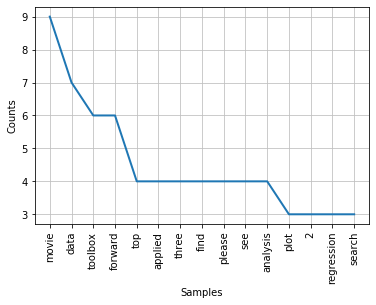

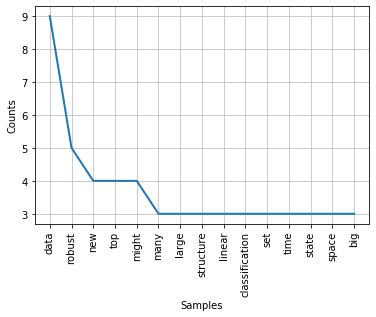

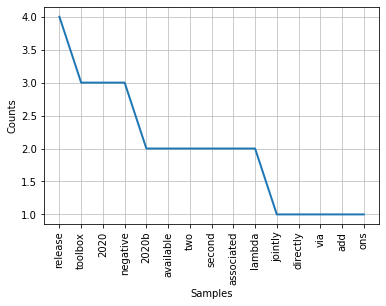

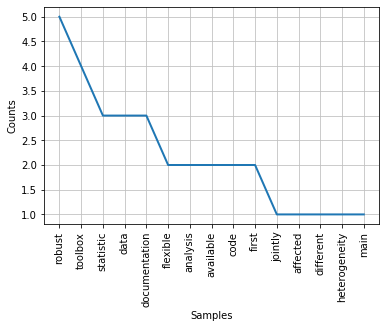

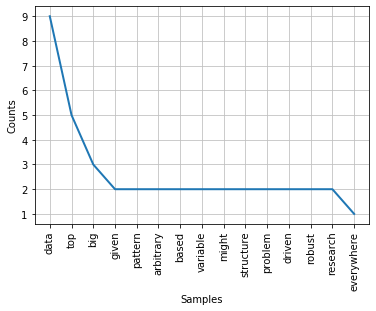

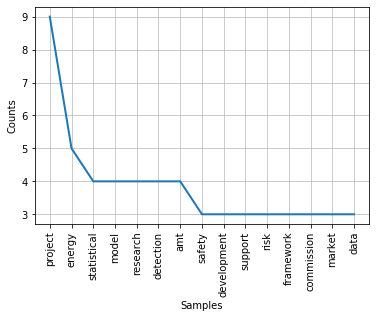

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [15]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,FSDA Toolbox « Ro.S.A. »,"{'jointly': 1, 'toolbox': 6, 'outlook': 1, 'lo..."
1,Research topics « Ro.S.A. »,"{'forward': 2, 'search': 2, 'widely': 2, 'acce..."
2,FSDA Toolbox « Ro.S.A. »,"{'jointly': 1, 'toolbox': 3, 'release': 4, '20..."
3,FSDA Toolbox « Ro.S.A. »,"{'jointly': 1, 'toolbox': 4, 'flexible': 2, 's..."
4,Research « Ro.S.A. »,"{'data': 9, 'everywhere': 1, 'several': 1, 'mi..."
5,Projects « Ro.S.A. »,"{'2017': 1, 'worker': 1, 'safety': 3, 'develop..."


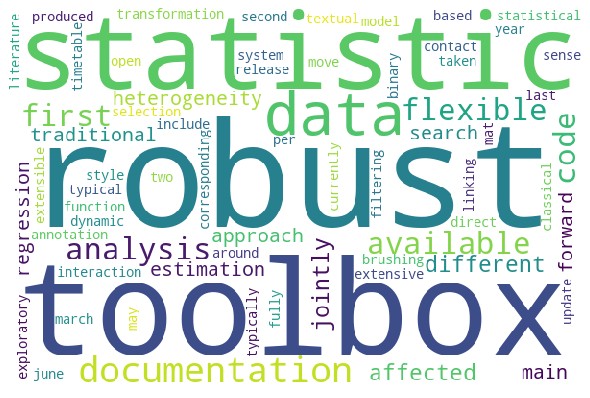

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [17]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [18]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

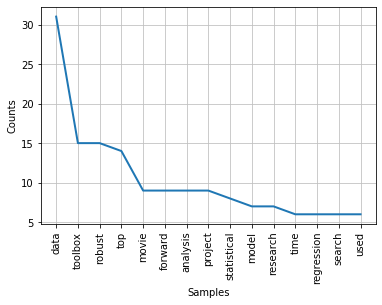

In [19]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [20]:
textfile = open('UniPr.txt', 'w')
textfile.write(tot_text)
textfile.close()

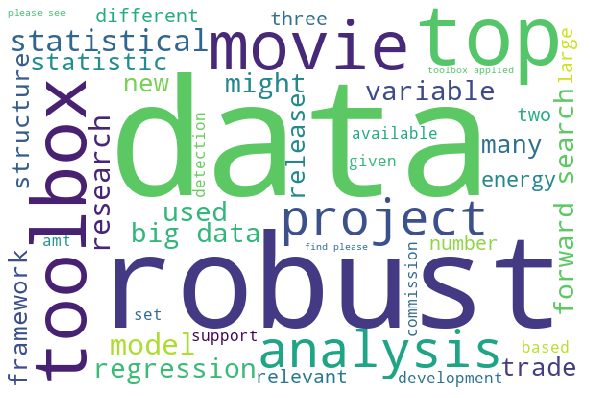

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()